In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [263]:
df=pd.read_csv('mushroom.csv')

In [264]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [265]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [266]:
df.isnull()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [267]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [268]:
df.shape

(8124, 23)

In [269]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [270]:
df.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [271]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [272]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [274]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [275]:
df_x=mus.drop(columns=["class"])
y=mus[["class"]]

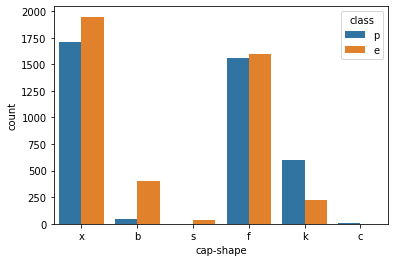

In [276]:
sns.countplot(x='cap-shape',hue='class',data=df)
plt.show()
#cap-shape x and f is have nearly equal amount of poisonous and not edible mushroom
#cap-shape k is more poisonous 
#cap-spape is s is edible mushroom

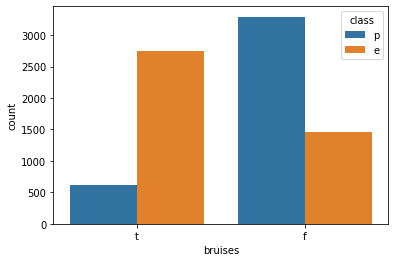

In [277]:
sns.countplot(x='bruises',hue='class',data=df)
plt.show()
#mushroom with no bruises are highly poisonous compare to with mushroom with bruises.

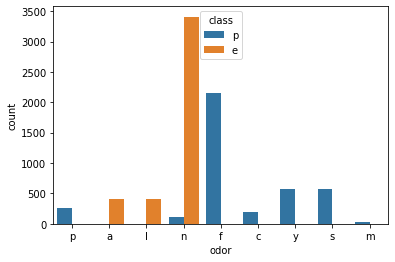

In [278]:
sns.countplot(x='odor',hue='class',data=df)
plt.show()
#Graph states that edible mushroom has odor of almond,anise and none 
#Mushroom with odor of foul,musty,pungent,spicy,creosote and fishy are poisonous

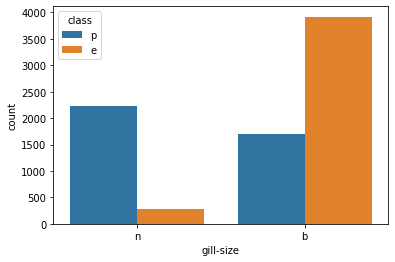

In [279]:
sns.countplot(x='gill-size',hue='class',data=mus)
plt.show()
#Narrow size mushroom is more poisonous than broad size

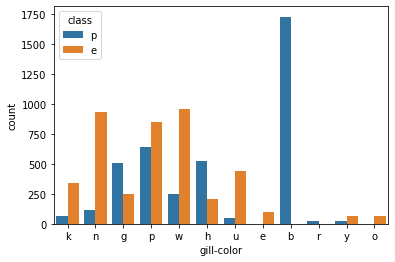

In [280]:
sns.countplot(x='gill-color',hue='class',data=mus)
plt.show()
#All buff gill color mushroom are poisonous and its high in number.
#do not eat mushroom which have gill color-buff

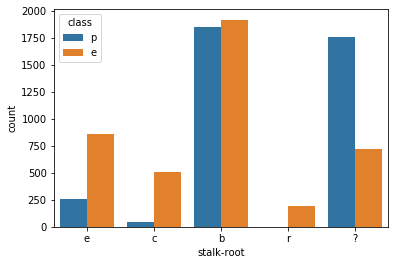

In [281]:
sns.countplot(x='stalk-root',hue='class',data=mus)
plt.show()
#Mushroom with stalk root r=rooted is edible as per graph 
#other mushroom with stalk root bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,missing=? are poisonous

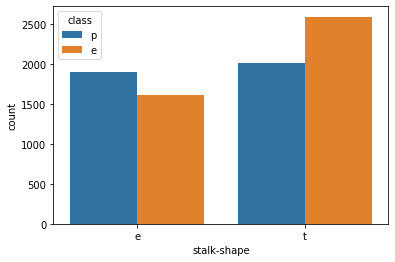

In [282]:
sns.countplot(x='stalk-shape',hue='class',data=mus)
plt.show()
#both stalk shape type have a nearly equal amount of edible and poisonous mushroom

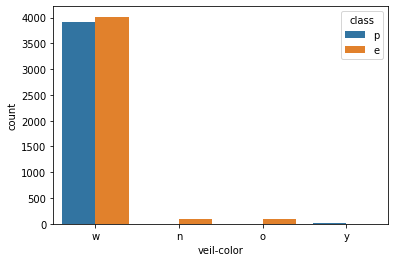

In [283]:
sns.countplot(x='veil-color',hue='class',data=df)
plt.show()
#veil color white is have maximum number of both of the class type and show very less variance

In [284]:
#since the veil color type show less variance we can drop this coloumn
df.drop(columns=['veil-color'],inplace=True)

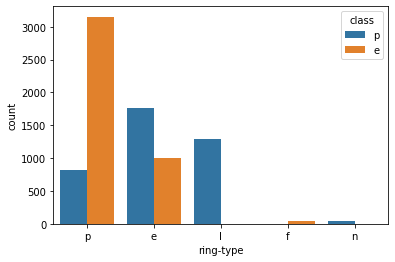

In [285]:
sns.countplot(x='ring-type',hue='class',data=df)
plt.show()
#l=large and n=none ring type mushroom are poisonous
#f=flaring ring type mushroom are edible

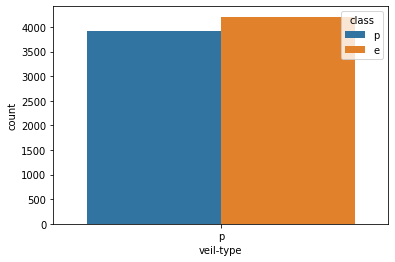

In [286]:
sns.countplot(x='veil-type',hue='class',data=df)
plt.show()
#veil type not provinding any differentiation between poisonous and edible mushroom

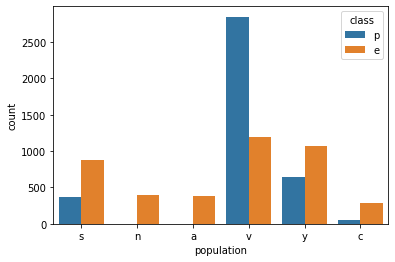

In [287]:
sns.countplot(x='population',hue='class',data=df)
plt.show()
#n=numerous and a=abundant population type mushroom are edible and rest have both of the class type

In [288]:
#dividing dataset into input and output 
df_x=df.drop(columns=['class'])
y=df[['class']]

In [289]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [290]:
df_x.shape

(8124, 92)

In [291]:
y.shape

(8124, 1)

In [292]:
df_x

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [293]:
df_x.shape

(8124, 92)

In [294]:
#lets bring input dataset featurs to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [295]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y
#Using LabelEncoder to convert target class into integers

array([1, 0, 0, ..., 0, 1, 0])

In [296]:
from sklearn.decomposition import PCA
pca=PCA(n_components=55)
y=pca.fit_transform(x)
#using PCA reducing the size of dataset and retain the maximum information to train model

In [297]:
sum(pca.explained_variance_ratio_)
#Information retained after reducing the dimention of dataset

0.9588342367003984

In [298]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)*100
var_cumu

array([ 9.70423453, 16.50621746, 22.45909367, 28.00121528, 32.92176007,
       37.60611389, 41.21232693, 44.02847747, 46.57610651, 48.89729569,
       51.11528375, 53.24062679, 55.30079086, 56.99361754, 58.64154645,
       60.13454799, 61.56084983, 62.96605822, 64.29638248, 65.60106082,
       66.8833375 , 68.10391471, 69.30548246, 70.49006559, 71.65996947,
       72.79078486, 73.89475026, 74.99467961, 76.08809647, 77.17719793,
       78.20318659, 79.21490569, 80.21349366, 81.17968096, 82.11920121,
       83.04018219, 83.9349426 , 84.82534888, 85.68988522, 86.5059221 ,
       87.29046125, 88.06425733, 88.80738887, 89.50697502, 90.19116546,
       90.86839237, 91.51470696, 92.14456428, 92.73204536, 93.29520407,
       93.83878665, 94.36876204, 94.88648084, 95.39206924, 95.88342367])

In [299]:
df.shape

(8124, 22)

In [300]:
x=df_x.iloc[:,0:-1]
x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [301]:
y=df_x.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: habitat_w, dtype: uint8

In [302]:
x.shape

(8124, 91)

In [303]:
y.shape

(8124,)

In [304]:
df['class'].value_counts()
#count of edible and poisonous mushroom 

e    4208
p    3916
Name: class, dtype: int64

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
#spliting the dataset into train and test for model training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [307]:
x_train.shape

(5443, 91)

In [308]:
x_test.shape

(2681, 91)

In [309]:
y_test.shape

(2681,)

In [310]:
y_train.shape

(5443,)

Modeling

In [311]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[2628    0]
 [   0   53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00        53

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [312]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
predknc=knc.predict(x_test)
print(accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

1.0
[[2628    0]
 [   0   53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00        53

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [313]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[2628    0]
 [   0   53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00        53

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [314]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

1.0
[[2628    0]
 [   0   53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00        53

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Cross Validation of algorithm

In [315]:
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[1. 1. 1. 1. 1.]
1.0 0.0


In [316]:
kncscores=cross_val_score(knc,x,y,cv=5)
print(kncscores)
print(kncscores.mean(),kncscores.std())

[1.         1.         1.         0.99876847 0.99261084]
0.9982758620689655 0.002872390095982924


In [318]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[1. 1. 1. 1. 1.]
1.0 0.0


In [319]:
abcscores=cross_val_score(abc,x,y,cv=5)
print(abcscores)
print(abcscores.mean(),abcscores.std())

[1. 1. 1. 1. 1.]
1.0 0.0


In [321]:
import joblib
joblib.dump(dtc,'dtcfile.obj')
dtc_from_joblib=joblib.load('dtcfile.obj')
dtc_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

DecisionTreeClassifier is the best algorithm to predict the edibility of the mushroom